In [11]:
# Simple CA simulator in Python
#
# *** Hosts & Pathogens ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3
interactive = False
import matplotlib
if interactive:
    matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pylab as PL
import random as RD
import scipy as SP

RD.seed()

width = 50
height = 50
initProb = 0.01
infectionRate = 0.85
regrowthRate = 0.15

def init():
    global time, config, nextConfig

    time = 0
    
    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = 2
            else:
                state = 1
            config[y, x] = state

    nextConfig = SP.zeros([height, width])

denslist=[]

def draw():
    density =[]
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 2, cmap = PL.cm.jet)
    PL.axis('image')
    PL.title(f'After {time} steps (t = {str(time)})')
    density.append(sum((sum(config==1)/(sum(config==1)+sum(config==0))))/len((sum(config==1)/(sum(config==1)+sum(config==0)))))
    denslist.append(density)

def step():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == 0:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 1:
                            if RD.random() < regrowthRate:
                                state = 1
            elif state == 1:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 2:
                            if RD.random() < infectionRate:
                                state = 2
            else:
                state = 0

            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config


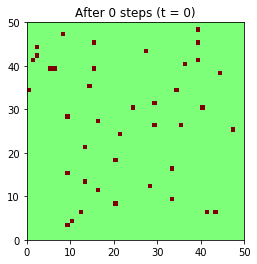

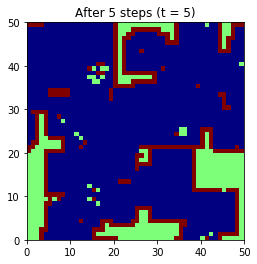

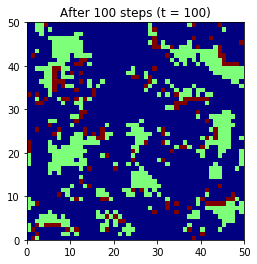

In [12]:
if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    gui = pycxsimulator.GUI(parameterSetters=[sim.set_density])
    gui.start(func=[sim.initialize, sim.draw, sim.step])

else:
    # Run the simulator for 100 steps and show some of the steps.
    init()
    draw()
    PL.figure()

    for i in range(5):
        step()
    draw()
    PL.figure()
    print('')

    for i in range(95):
        step()
    draw()

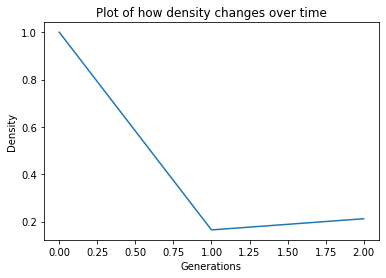

In [13]:
# Here is the plot of how density changes over time, as aforementioned.

plt.title('Plot of how density changes over time')
plt.xlabel("Generations")
plt.ylabel("Density")
plt.plot(denslist)